E:/TensorFlow/images/20190706-IMG_5369.jpg


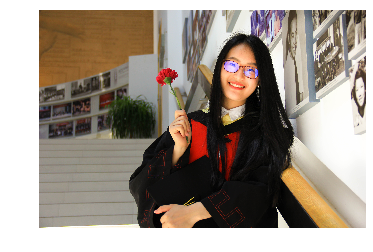

abaya (score=0.20985)
sunglasses, dark glasses, shades (score=0.12438)
stole (score=0.06705)
mask (score=0.02790)
sunglass (score=0.02608)

E:/TensorFlow/images/20190706-IMG_5376.jpg


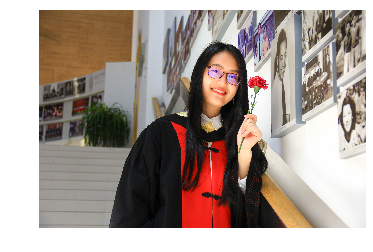

abaya (score=0.21056)
stole (score=0.11315)
academic gown, academic robe, judge's robe (score=0.04234)
mortarboard (score=0.03739)
mask (score=0.03444)

E:/TensorFlow/images/20190706-IMG_5412.jpg


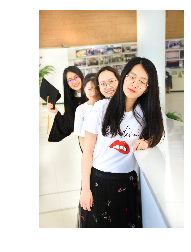

miniskirt, mini (score=0.18579)
abaya (score=0.08487)
apron (score=0.06050)
pajama, pyjama, pj's, jammies (score=0.05017)
jean, blue jean, denim (score=0.02999)

E:/TensorFlow/images/cat.jpg


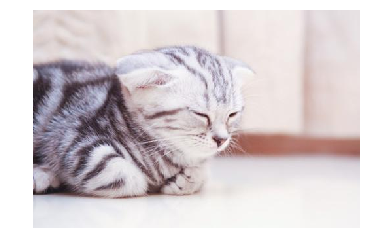

Egyptian cat (score=0.83663)
tiger cat (score=0.05177)
tabby, tabby cat (score=0.04787)
lynx, catamount (score=0.00623)
tiger, Panthera tigris (score=0.00090)

E:/TensorFlow/images/dog.jpg


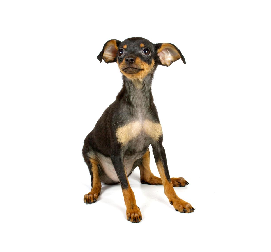

toy terrier (score=0.50365)
miniature pinscher (score=0.34323)
Mexican hairless (score=0.04298)
Chihuahua (score=0.02695)
Doberman, Doberman pinscher (score=0.00774)

E:/TensorFlow/images/glass.JPG


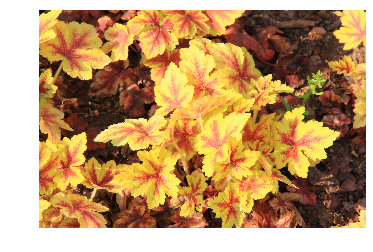

gyromitra (score=0.60364)
hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa (score=0.11263)
admiral (score=0.07908)
coral fungus (score=0.06575)
pot, flowerpot (score=0.01269)

E:/TensorFlow/images/IMG_5257.JPG


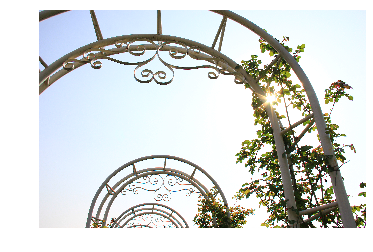

coil, spiral, volute, whorl, helix (score=0.90159)
bannister, banister, balustrade, balusters, handrail (score=0.03695)
vault (score=0.00262)
gong, tam-tam (score=0.00218)
sundial (score=0.00187)

E:/TensorFlow/images/plane.jpg


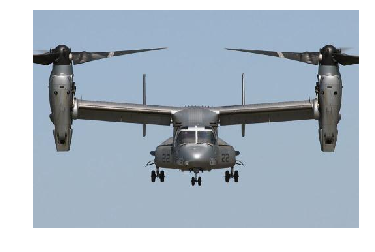

warplane, military plane (score=0.75146)
airliner (score=0.07629)
wing (score=0.04471)
space shuttle (score=0.04347)
airship, dirigible (score=0.00405)



In [4]:
# coding: UTF-8
import tensorflow as tf
import os
import numpy as np
import re
from PIL import Image
import matplotlib.pyplot as plt
 
 
class NodeLookup(object):
    def __init__(self):
        label_lookup_path = 'E:/TensorFlow/inception_model/imagenet_2012_challenge_label_map_proto.pbtxt'
        uid_lookup_path = 'E:/TensorFlow/inception_model/imagenet_synset_to_human_label_map.txt'
        self.node_lookup = self.load(label_lookup_path, uid_lookup_path)
 
    def load(self, label_lookup_path, uid_lookup_path):
        # 加载分类字符串n***********对应分类名称的文件
        proto_as_ascii_lines = tf.gfile.GFile(uid_lookup_path).readlines()
        uid_to_human = {}
        for line in proto_as_ascii_lines:
            line = line.strip('\n')
            parsed_items = line.split('\t')
            uid = parsed_items[0]  # n15092227
            human_string = parsed_items[1]
            uid_to_human[uid] = human_string
 
        proto_as_ascii = tf.gfile.GFile(label_lookup_path).readlines()
        node_id_to_uid = {}
        for line in proto_as_ascii:
            if line.startswith('  target_class:'):
                target_class = int(line.split(': ')[1])
            if line.startswith('  target_class_string:'):
                target_class_string = line.split(': ')[1]
                node_id_to_uid[target_class] = target_class_string[1: -2]
 
        node_id_to_name = {}
        for key, val in node_id_to_uid.items():
            name = uid_to_human[val]
            node_id_to_name[key] = name
 
        return node_id_to_name
 
    def id_to_string(self, node_id):
        if node_id not in self.node_lookup:
            return ''
        return self.node_lookup[node_id]
 
 
# 创建图来存放调整好的模型
with tf.gfile.FastGFile('E:/TensorFlow/inception_model/classify_image_graph_def.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')
 
with tf.Session() as sess:
    softmax_tensor = sess.graph.get_tensor_by_name('softmax:0')
    # 遍历目录
    for root, dirs, files in os.walk('E:/TensorFlow/images/'):
        for file in files:
            image_data = tf.gfile.FastGFile(os.path.join(root, file), 'rb').read()
            predictions = sess.run(softmax_tensor, {'DecodeJpeg/contents:0': image_data})
            predictions = np.squeeze(predictions)
 
            image_path = os.path.join(root, file)
            print(image_path)
 
            img = Image.open(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()
 
            top_k = predictions.argsort()[-5:][::-1]
            node_lookup = NodeLookup()
            for node_id in top_k:
                human_string = node_lookup.id_to_string(node_id)
                score = predictions[node_id]
                print('%s (score=%.5f)' % (human_string, score))
            print()